# Решающие деревья и случайные леса

Импортируем данные: датасет [Wine Quality]().   
Будем предсказывать качество белого вина по его химическим характеристикам, будем считать это задачей классификации. 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')

In [4]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Посмотрим на распределение классов. 

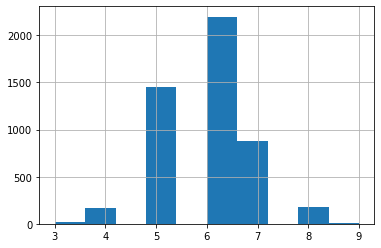

In [5]:
wine.quality.hist()

## Делим на обучающую и тестовую выборку

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
RANDOM_SEED = 0

In [0]:
target = wine.quality
data = wine.drop(columns=['quality'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=RANDOM_SEED, stratify=target)

## Решающее дерево

Обучим решающее дерево без ограничений по глубине и количеству объектов в листе и оценим качество.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [0]:
tree_clf = DecisionTreeClassifier()

In [12]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = tree_clf.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.35      0.32      0.33        41
           5       0.61      0.62      0.61       364
           6       0.65      0.64      0.65       550
           7       0.52      0.51      0.52       220
           8       0.43      0.52      0.47        44
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1225
   macro avg       0.37      0.37      0.37      1225
weighted avg       0.60      0.59      0.59      1225



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Решающий лес

Обучим решающий лес состоящий из 100 деревьев. 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [17]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = rf_clf.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       1.00      0.20      0.33        41
           5       0.71      0.69      0.70       364
           6       0.65      0.81      0.72       550
           7       0.71      0.48      0.57       220
           8       0.84      0.48      0.61        44
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1225
   macro avg       0.56      0.38      0.42      1225
weighted avg       0.69      0.68      0.67      1225



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Зависимотсть качества предсказаний от количества деревьев.

Будем смотреть на взвешенное среднее f1-меры по всем классам на обучающей и тестовой выборке, а также на время обучения 

In [0]:
from sklearn.metrics import f1_score
import time

num_trees = [1]
num_trees.extend(range(10, 100, 10))
num_trees.extend(range(100, 1100, 100))

quality_train = []
quality_test = []
training_time = []


for num in num_trees:
    model = RandomForestClassifier(n_estimators=num)

    start = time.time()
    model.fit(X_train, y_train)
    training_time.append(time.time() - start)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    quality_train.append(f1_score(y_train, y_pred_train, average='weighted'))
    quality_test.append(f1_score(y_test, y_pred, average='weighted'))



Строим график зависимости качества от количества деревьев

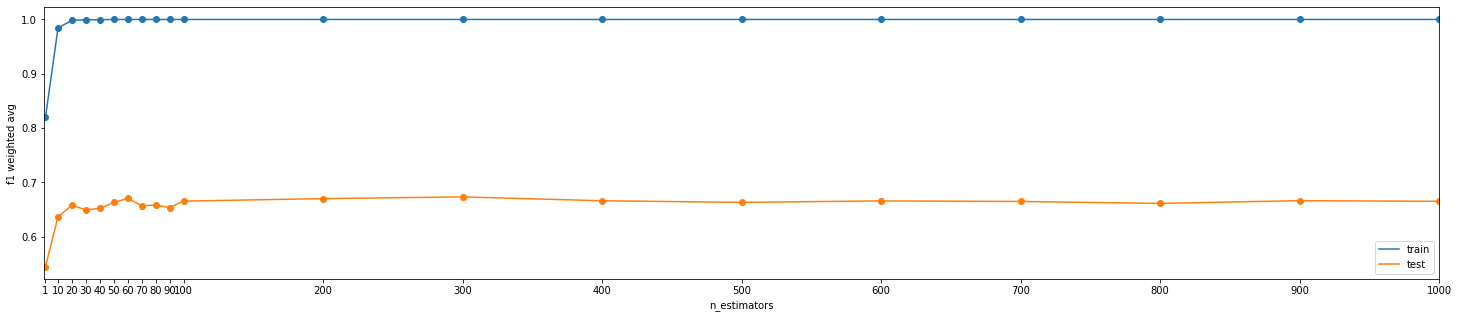

In [56]:
plt.figure(figsize=(25, 5)) # задаем размер графика

plt.scatter(num_trees, quality_train) # рисуем точки
plt.plot(num_trees, quality_train, label='train') # соединяем точки линией
plt.scatter(num_trees, quality_test)
plt.plot(num_trees, quality_test, label='test')

plt.xlim(0, num_trees[-1])
plt.xticks(num_trees)
plt.xlabel("n_estimators")
plt.ylabel("f1 weighted avg")
plt.legend(loc="lower right")
plt.show()

Строим график зависимости времени обучения от количества деревьев

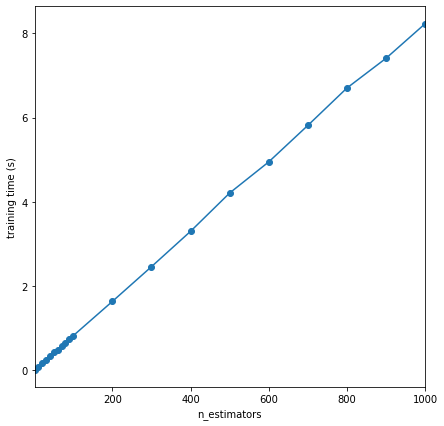

In [54]:
plt.figure(figsize=(7, 7))

plt.scatter(num_trees, training_time)
plt.plot(num_trees, training_time)

plt.xlim(num_trees[0], num_trees[-1])
plt.xlabel("n_estimators")
plt.ylabel("training time (s)")
plt.show()

## Важность признаков

In [0]:
feature_importances = rf_clf.feature_importances_

In [58]:
# веса признаков, чем больше вес, тем важнее признак, в сумме дают 1
feature_importances

array([0.07331736, 0.09949774, 0.08108972, 0.08779051, 0.08623414,
       0.09502777, 0.09066597, 0.10374101, 0.08609206, 0.0816507 ,
       0.11489302])

In [74]:
# соотнести массив весов с названиями признаков и отсортировать по убыванию
for ind in np.argsort(-feature_importances):
    print(data.columns[ind], '-', feature_importances[ind])

alcohol - 0.11815015083509549
density - 0.10145168663692623
volatile acidity - 0.0993022959869882
free sulfur dioxide - 0.0945926198986317
total sulfur dioxide - 0.09112681028779888
residual sugar - 0.08903770616990121
pH - 0.08670571385937127
chlorides - 0.08282434263449574
citric acid - 0.08201955143048775
sulphates - 0.08094807089295379
fixed acidity - 0.07384105136734985
